In [322]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')
import matplotlib as plt

In [323]:
df = pd.read_csv('apple_stock.csv', parse_dates=['Date'], index_col='Date')
df['Open'] = df['Open'].str.replace('\\$', '', regex=True)
df['High'] = df['High'].str.replace('\\$', '', regex=True)
df['Low'] = df['Low'].str.replace('\\$', '', regex=True)
df['Close'] = df['Close'].str.replace('\\$', '', regex=True)

df.tail()



,Open,High,Low,Close,Volume
Date,,,,,
2022-09-30,141.28,143.10,138.00,138.20,124925300
2022-09-29,146.10,146.72,140.68,142.48,128138200
2022-09-28,147.64,150.64,144.84,149.84,146691400
2022-09-27,152.74,154.72,149.95,151.76,84442740
2022-09-26,149.66,153.77,149.64,150.77,93339410


In [324]:
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)

df.head(100)

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-25,174.20,176.97,174.15,176.08,46172740
2023-09-22,174.67,177.08,174.05,174.79,56725390
2023-09-21,174.55,176.30,173.86,173.93,63149120
2023-09-20,179.26,179.70,175.40,175.49,58436180
2023-09-19,177.52,179.63,177.13,179.07,51826940
...,...,...,...,...,...
2023-05-09,173.05,173.54,171.60,171.77,45326870
2023-05-08,172.48,173.85,172.11,173.50,55962790
2023-05-05,170.98,174.30,170.76,173.57,113453200


In [325]:
# printing the rows that from 1st September to 31st January
date_range = pd.date_range(start='2022-09-01', end='2023-01-31', freq='D')
df_range = df[df.index.isin(date_range)]

# finding mean of all values in that range
df_range['Open'].mean()

141.44125

<Axes: xlabel='Date'>

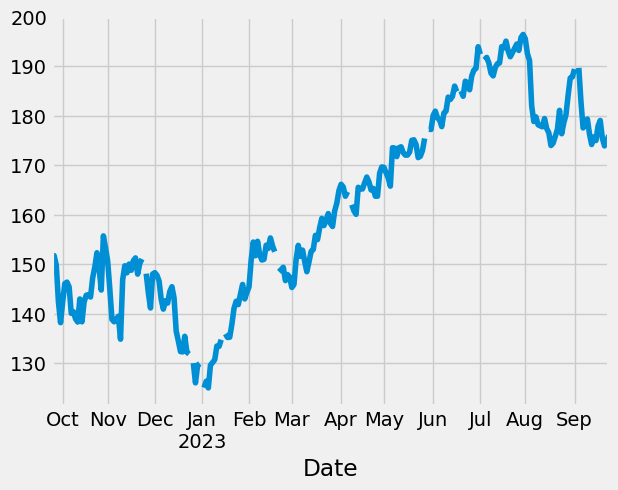

In [326]:
# resampling, finding monthly stock prices mean
df['Close'].resample('B').mean().plot()

In [327]:
# B         business day frequency
# C         custom business day frequency (experimental)
# D         calendar day frequency
# W         weekly frequency
# M         month end frequency
# SM        semi-month end frequency (15th and end of month)
# BM        business month end frequency
# CBM       custom business month end frequency
# MS        month start frequency
# SMS       semi-month start frequency (1st and 15th)
# BMS       business month start frequency
# CBMS      custom business month start frequency
# Q         quarter end frequency
# BQ        business quarter endfrequency
# QS        quarter start frequency
# BQS       business quarter start frequency
# A         year end frequency
# BA, BY    business year end frequency
# AS, YS    year start frequency
# BAS, BYS  business year start frequency
# BH        business hour frequency
# H         hourly frequency
# T, min    minutely frequency
# S         secondly frequency
# L, ms     milliseconds
# U, us     microseconds
# N         nanoseconds

<Axes: xlabel='Date'>

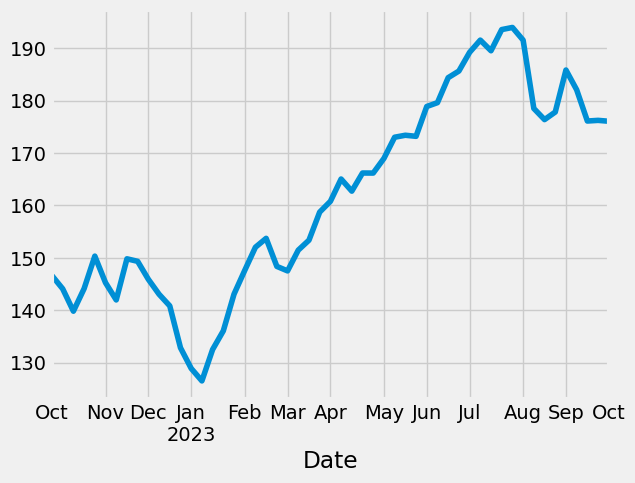

In [328]:
# resampling, finding monthly stock prices mean
df['Close'].resample('W').mean().plot()

In [329]:
# we only have data for the weekdays, we will enhance our dataset to weekends and set opening and closing price of weekends to be closing proce on friday
df = df.asfreq('D', method='bfill') # bfil fills the data from friday to saturday and sunday
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-16,176.48,176.50,173.82,175.01,109259500
2023-09-17,176.48,176.50,173.82,175.01,109259500
2023-09-18,176.48,179.38,176.17,177.97,67257570
2023-09-19,177.52,179.63,177.13,179.07,51826940
2023-09-20,179.26,179.70,175.40,175.49,58436180
2023-09-21,174.55,176.30,173.86,173.93,63149120
2023-09-22,174.67,177.08,174.05,174.79,56725390
2023-09-23,174.67,177.08,174.05,174.79,56725390
2023-09-24,174.67,177.08,174.05,174.79,56725390


In [330]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [331]:
# remove all US federal holidays from your dataset
df = df.asfreq(usb)


In [332]:
# creating a custom calendar
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday

class myBirthdayCalendar(AbstractHolidayCalendar):
    """
    US Federal Government Holiday Calendar based on rules specified by:
    https://www.opm.gov/policy-data-oversight/pay-leave/federal-holidays/
    """

    rules = [
        Holiday("Shikhar Bday", month=5, day=16, observance=nearest_workday)
        
    ]

myc = CustomBusinessDay(calendar=myBirthdayCalendar())

df = df.asfreq(myc)
df.tail(20)



,Open,High,Low,Close,Volume
Date,,,,,
2023-08-29,179.70,184.90,179.50,184.12,53003950.0
2023-08-30,184.94,187.85,184.74,187.65,60813890.0
2023-08-31,187.84,189.12,187.48,187.87,60794470.0
2023-09-01,189.49,189.92,188.28,189.46,45766500.0
2023-09-04,NaN,NaN,NaN,NaN,NaN
2023-09-05,188.28,189.98,187.61,189.70,45280030.0
2023-09-06,188.40,188.85,181.47,182.91,81755820.0
2023-09-07,175.18,178.21,173.54,177.56,112488800.0
2023-09-08,178.35,180.24,177.79,178.18,65602070.0


In [333]:
# nearest_workday - move Saturday to Friday and Sunday to Monday
# sunday_to_monday - move Sunday to following Monday
# next_monday_or_tuesday - move Saturday to Monday and Sunday/Monday to Tuesday
# previous_friday - move Saturday and Sunday to previous Friday”
# next_monday - move Saturday and Sunday to following Monday

In [334]:
# providing a custom week with custom holidays
b = CustomBusinessDay(weekmask = "Sun" "Mon")
df = df.asfreq(b)
df = df.dropna()
df.tail(20)

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-24,165.00,165.60,163.89,165.33,41949580.0
2023-05-01,169.28,170.45,168.64,169.59,52472940.0
2023-05-08,172.48,173.85,172.11,173.50,55962790.0
2023-05-15,173.16,173.21,171.47,172.07,37266660.0
2023-05-22,173.98,174.71,173.45,174.20,43570930.0
2023-06-05,182.63,184.95,178.04,179.58,121946500.0
2023-06-12,181.27,183.89,180.97,183.79,54755000.0
2023-06-26,186.83,188.05,185.23,185.27,48088660.0
2023-07-03,193.78,193.88,191.76,192.46,31346600.0


TIME SERIES FORECASTING USING XGBoost

In [335]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
import xgboost as xgb
plt.style.use('fivethirtyeight')
import copy

In [336]:
df = pd.read_csv('./archive/PJME_hourly.csv')

df.head()

df = df.set_index('Datetime')

In [337]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<Axes: title={'center': 'PJME Energy Used in MW'}, xlabel='Datetime'>

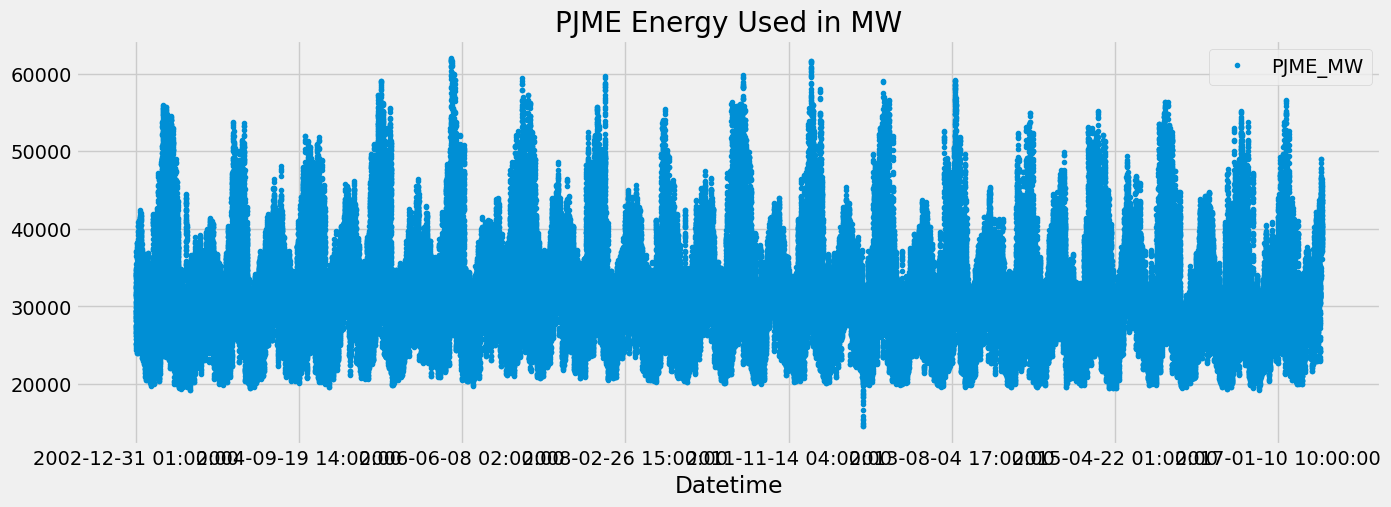

In [338]:
df.plot(style='.', figsize=(15,5), color = color_pal[0], title='PJME Energy Used in MW')

In [339]:
df.index = pd.to_datetime(df.index)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<Axes: title={'center': 'PJME Energy Used in MW'}, xlabel='Datetime'>

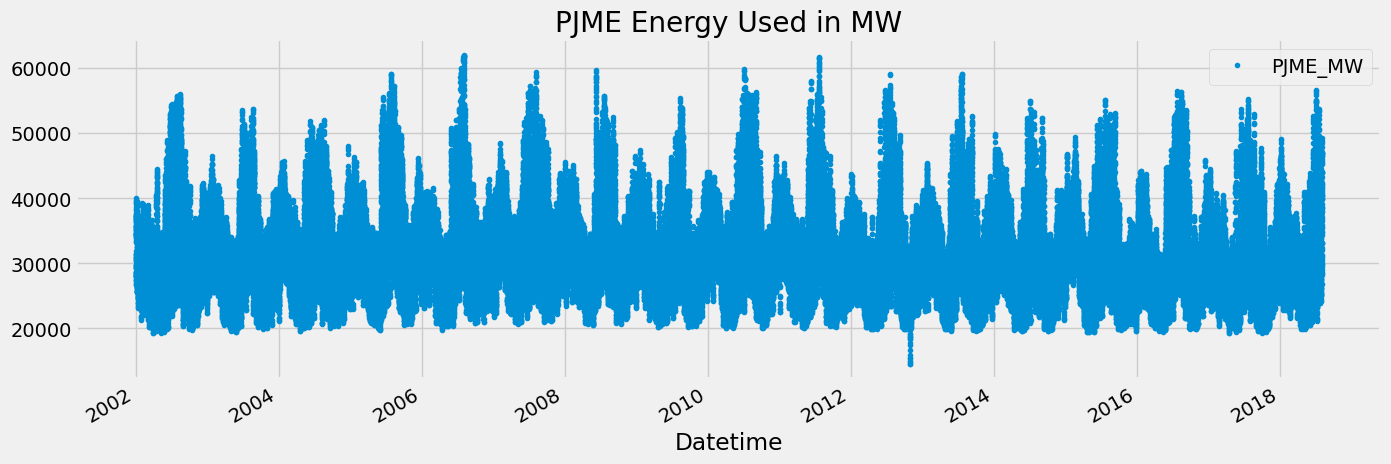

In [340]:
df.plot(style='.', figsize=(15,5), color = color_pal[0], title='PJME Energy Used in MW')

Train/Test split

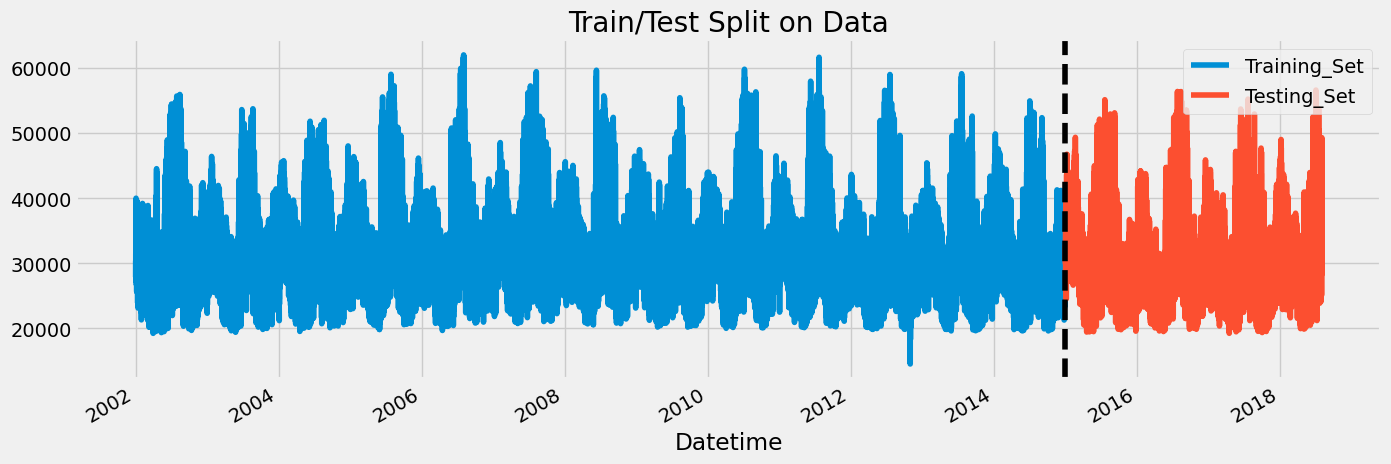

In [341]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training_Set', title='Train/Test Split on Data')
test.plot(ax=ax, label='Testing_Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training_Set','Testing_Set'])
plt.show()


In [342]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


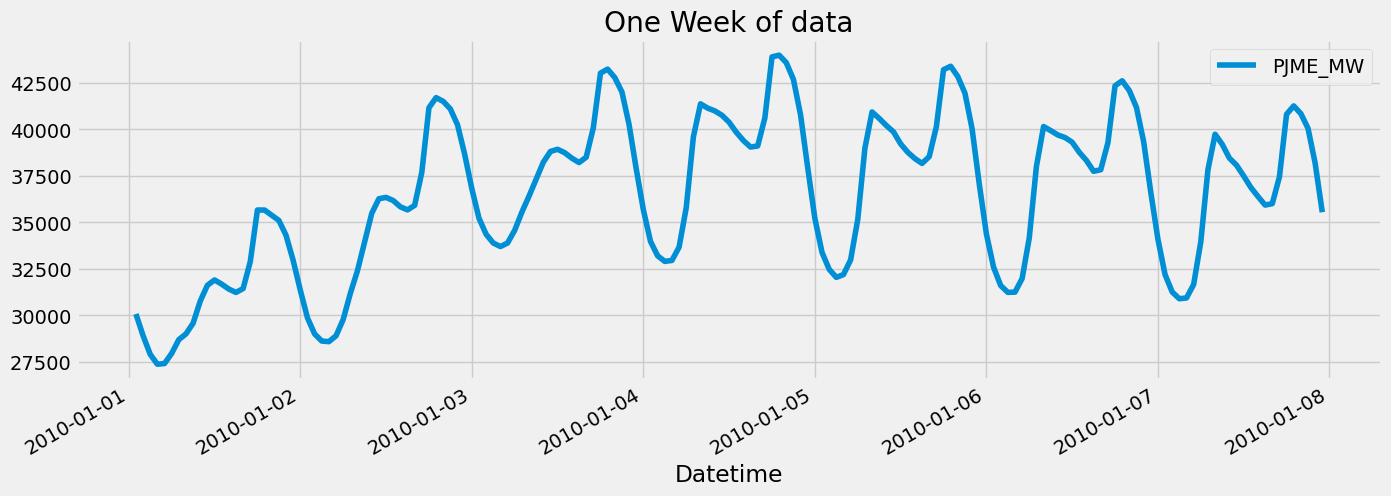

In [343]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5), title='One Week of data')
plt.show()

In [344]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


Feature Creation

In [345]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.day_of_year
    return df
df = create_features(df)

Visualize our feature to target relationships

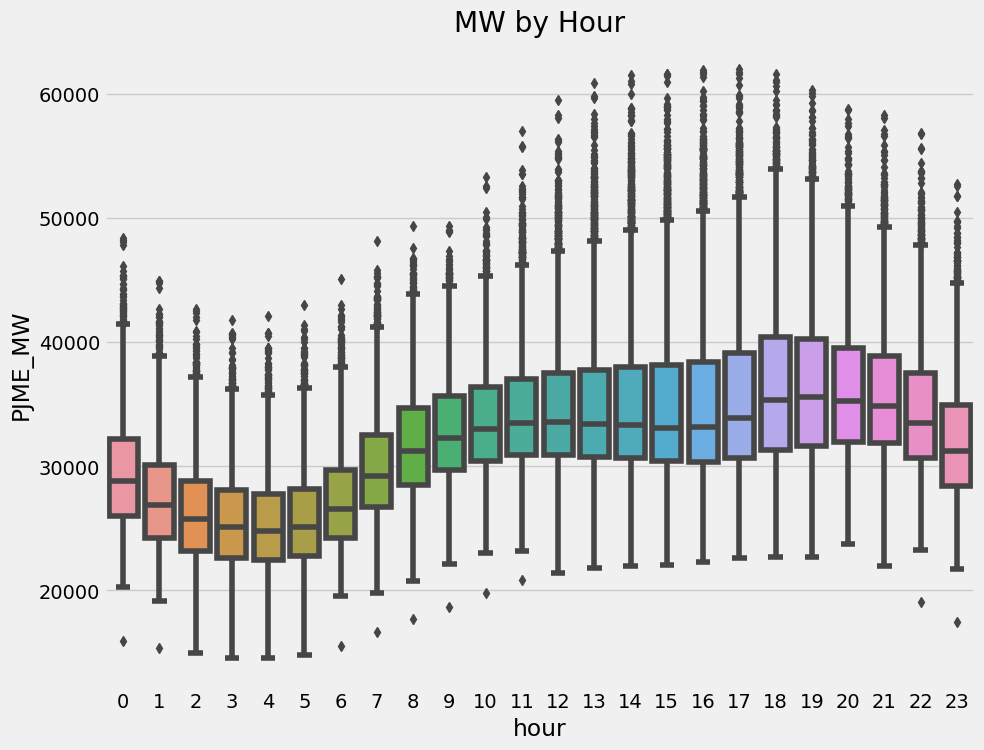

In [346]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

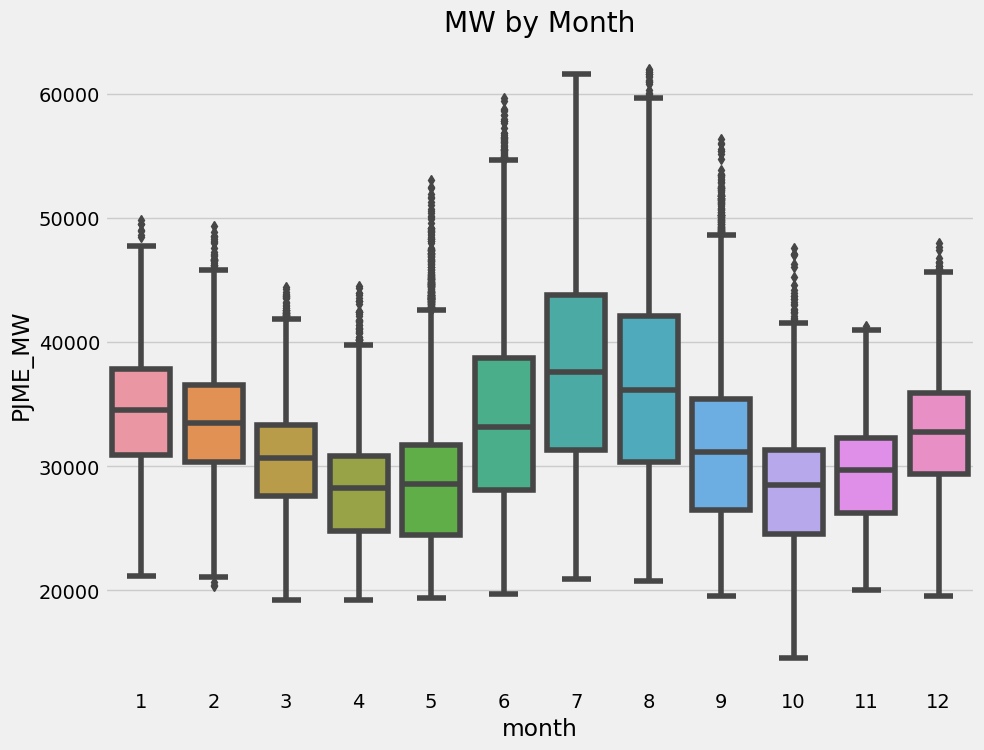

In [347]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW')
ax.set_title('MW by Month')
plt.show()

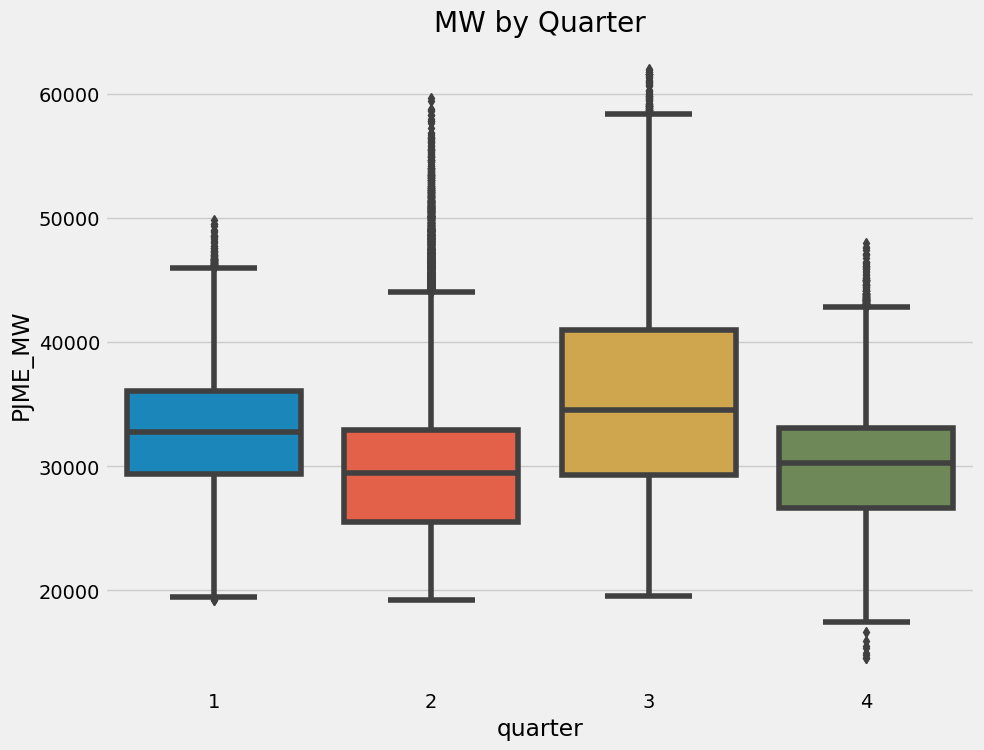

In [348]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='PJME_MW')
ax.set_title('MW by Quarter')
plt.show()

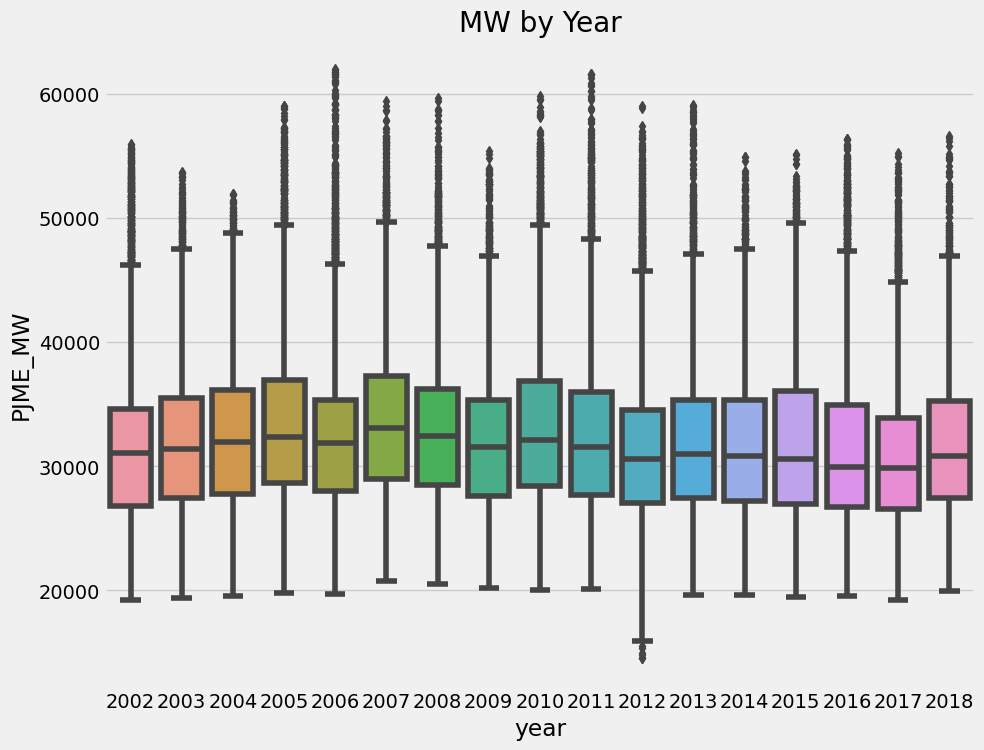

In [349]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='PJME_MW')
ax.set_title('MW by Year')
plt.show()

Creating Model

In [350]:
from sklearn.metrics import mean_squared_error
train = create_features(train)
test = create_features(test)

In [351]:
df.columns
FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

In [352]:
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

In [353]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.001)
reg.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)], verbose=100)

[0]	validation_0-rmse:6447.78573	validation_1-rmse:6517.54145
[100]	validation_0-rmse:6026.49339	validation_1-rmse:6131.08053
[200]	validation_0-rmse:5654.75124	validation_1-rmse:5796.65490
[300]	validation_0-rmse:5326.88030	validation_1-rmse:5505.59274
[400]	validation_0-rmse:5039.56899	validation_1-rmse:5253.21086
[500]	validation_0-rmse:4788.58887	validation_1-rmse:5034.74880
[600]	validation_0-rmse:4565.97498	validation_1-rmse:4847.76655
[700]	validation_0-rmse:4372.19812	validation_1-rmse:4687.11295
[800]	validation_0-rmse:4202.53312	validation_1-rmse:4547.57144
[900]	validation_0-rmse:4055.65261	validation_1-rmse:4427.00726
[999]	validation_0-rmse:3929.32983	validation_1-rmse:4325.35302


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Feature Importance

In [354]:
fi = pd.DataFrame(data = reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])

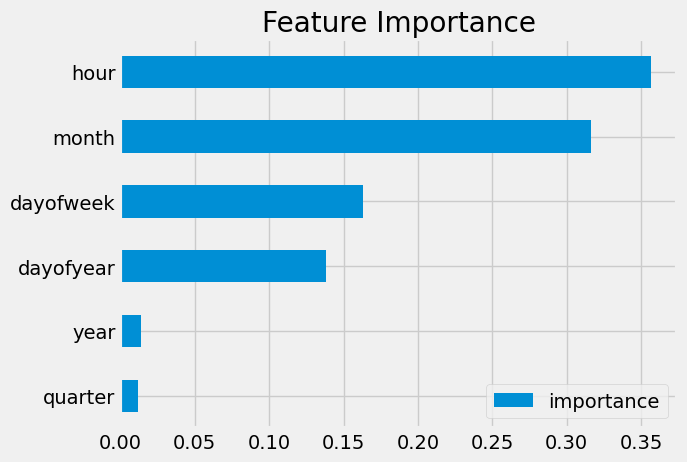

In [355]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

FORECAST ON TEST SET

In [356]:
test['prediction'] = reg.predict(X_test)

In [357]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

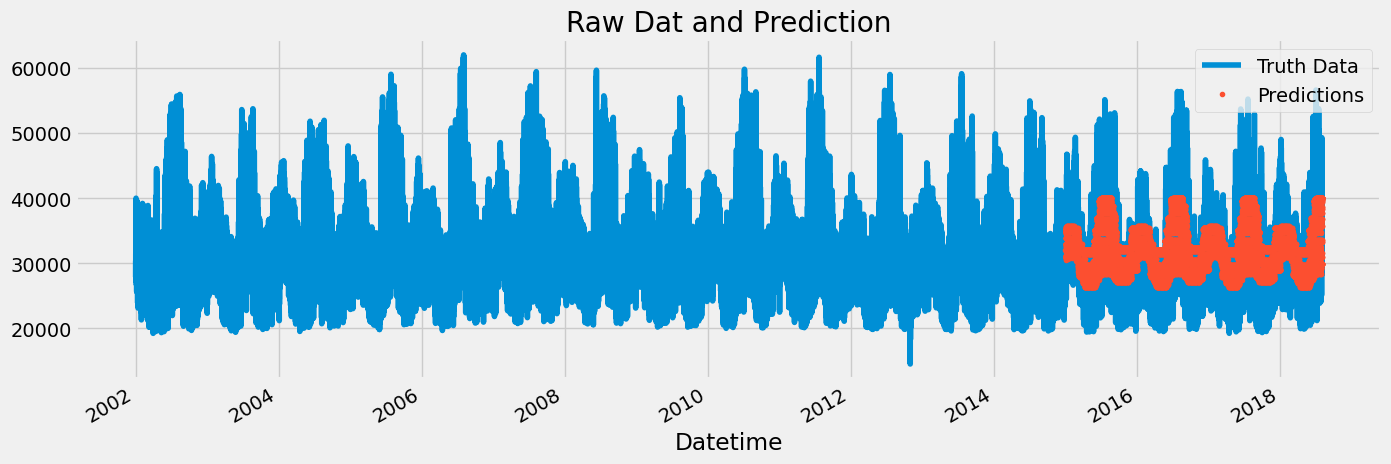

In [358]:

ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

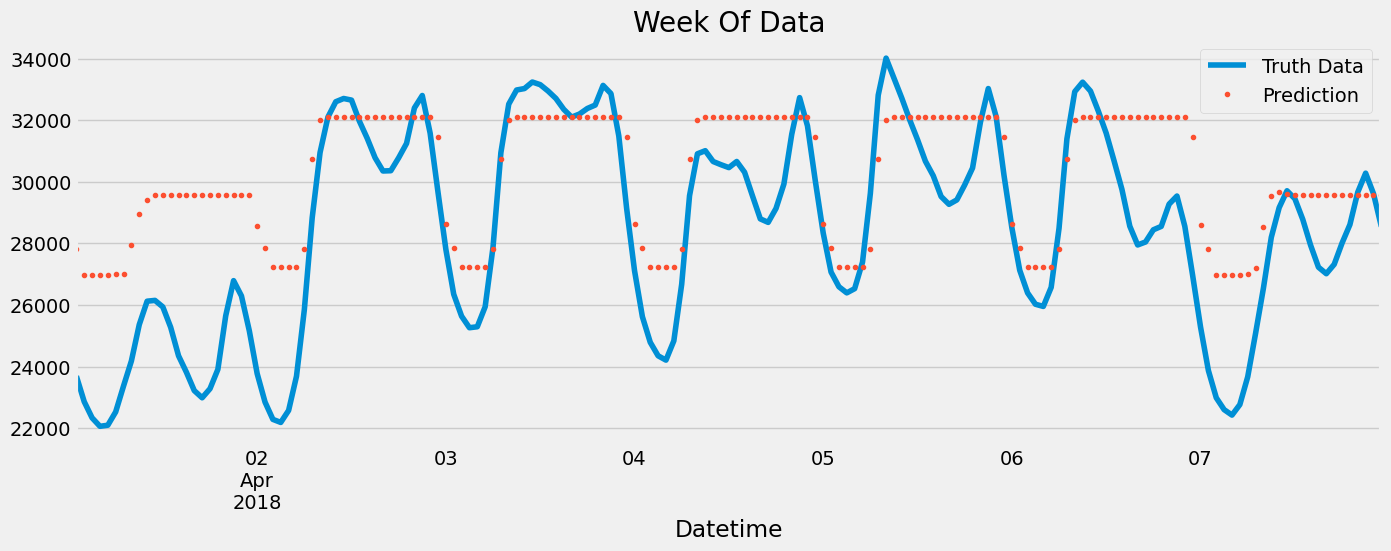

In [359]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [360]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 4325.35


Calculating error

Worst Predictions

In [361]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2016-08-13    12092.418620
2016-08-14    11407.225098
2018-01-06    11024.924316
2015-02-20    10791.006348
2016-09-09    10337.963704
2015-02-16    10183.015137
2016-09-10    10045.417725
2018-01-05     9977.450684
2018-01-07     9726.312012
2016-08-12     9678.751790
Name: error, dtype: float64

Best Predictions

In [362]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2016-12-29     764.857666
2016-12-30     783.728760
2017-11-18     849.959310
2017-03-18     870.751546
2018-04-03     880.189860
2016-02-16     883.540365
2016-12-12     970.303955
2018-04-17     994.595947
2015-03-04     997.391357
2018-03-10    1006.653402
Name: error, dtype: float64